# EEG.machinelearing_data_BRMH

_No sé por qué Anaconda me lleva a la raíz de mi carpeta en lugar de abrir el notebook en el directorio correcto._
_Comenta esta línea en caso de que el notebook se abra en la raíz correcta._

In [1]:
cd

C:\Users\Jesus


c:\Users\Jesus\.conda\envs\DataScience\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
c:\Users\Jesus\.conda\envs\DataScience\Lib\site-packages\IPython\core\magics\osm.py:428: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
cd Downloads/icd2024Gortarez/practices

C:\Users\Jesus\Downloads\icd2024Gortarez\practices


c:\Users\Jesus\.conda\envs\DataScience\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


La tercer práctica consiste en predecir el valor de una variable a partir de un conjunto de variables predictoras en un dataset de venta de casas en Italia. La variable a predecir será el precio de una casa.

Se deberá realizar:
1. La limpieza de los datos.
2. Un análisis exploratorio de los datos.
3. Una técnica de reducción de dimensionalidad.
4. Extracción de características para crear por lo menos 2 atributos nuevos (que sean interesantes).
5. Aplicar al menos dos técnicas de selección de características.
6. Entrenar al menos 4 modelos de regresión diferentes (uno tiene que ser regresión lineal),
7. Reportar el resultado de evaluación con una partición de los datos local.
8. Reportar el resultado de evaluación con un conjunto de datos de prueba que se les será proporcionado dos días antes.
9. Escribir una discusión y las conclusiones sobre el trabajo realizado.

La métrica a utilizar será R².

In [3]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector


#Codifica valores categoricos en numericos
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import matplotlib.pyplot as plt
import seaborn as sns

# Reduccion de dimencionalidad
from sklearn.decomposition import PCA

# Selección de características
from sklearn.feature_selection import SelectKBest, f_classif


# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


## Visión general de los datos (Análisis)

In [5]:
df = pd.read_csv("Practica 3 train_housing_data_italy.csv")
df.head()

,timestamp,location,title,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,availability,...,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
0,1.661114e+09,siculiana,"villa unifamiliare via campo spoto 38, siculiana",46000.0,4.0,NaN,85.0,2.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,37.338086,13.421996
1,1.661114e+09,strongoli,"quadrilocale contrada tronga 211, tronca, stro...",120000.0,4.0,2.0,190.0,2.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,39.263959,17.052026
2,1.661114e+09,zelbio,"bilocale buono stato, piano terra, zelbio",55000.0,2.0,NaN,85.0,1.0,NaN,not free / other,...,0,1,0,1,0,0,0,0,45.904582,9.180539
3,1.661114e+09,villamagna,"casa colonica, da ristrutturare, 319 m², villa...",130000.0,4.0,NaN,319.0,1.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,42.333295,14.236808
4,1.661114e+09,vallefiorita,"appartamento corso italia, vallefiorita",30000.0,NaN,NaN,143.0,2.0,NaN,not free / other,...,0,0,0,1,0,0,0,0,38.776385,16.461003


***Imprime un resumen del DataFrame, mostrando información sobre las columnas, el tipo de datos, y cuántos valores no nulos tiene cada una. Necesario para asegurarse de que la base de datos no caresca de algun dato.***

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             213409 non-null  float64
 1   location              213409 non-null  object 
 2   title                 213409 non-null  object 
 3   price                 175931 non-null  float64
 4   n_rooms               155561 non-null  float64
 5   floor                 144307 non-null  float64
 6   mq                    209520 non-null  float64
 7   n_bathrooms           199605 non-null  float64
 8   year_of_construction  213399 non-null  float64
 9   availability          213409 non-null  object 
 10  energy_class          212761 non-null  object 
 11  status                213409 non-null  object 
 12  heating               213409 non-null  object 
 13  has_garage            213409 non-null  int64  
 14  has_terrace           213409 non-null  int64  
 15  

***Imprime las dimensiones del DataFrame en forma de una tupla (número de filas, número de columnas)***

In [7]:
print(df.shape)

(213409, 26)


***Muestra la cantidad de valores faltantes (NaN) en las columnas donde falten datos del DataFrame.***

In [8]:
print(df.isna().sum())

timestamp                   0
location                    0
title                       0
price                   37478
n_rooms                 57848
floor                   69102
mq                       3889
n_bathrooms             13804
year_of_construction       10
availability                0
energy_class              648
status                      0
heating                     0
has_garage                  0
has_terrace                 0
has_garden                  0
has_balcony                 0
has_fireplace               0
has_alarm                   0
has_air_conditioning        0
has_pool                    0
has_parking                 0
has_elevator                0
is_furnished                0
latitude                   60
longitude                  60
dtype: int64


In [9]:
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

price                   37478
n_rooms                 57848
floor                   69102
mq                       3889
n_bathrooms             13804
year_of_construction       10
energy_class              648
latitude                   60
longitude                  60
dtype: int64


***Muestra el número de datos duplicados en caso de existir.***

In [10]:
df.duplicated().sum()

822

In [11]:
print(df.describe())

          timestamp         price        n_rooms          floor  \
count  2.134090e+05  1.759310e+05  155561.000000  144307.000000   
mean   1.661136e+09  2.413253e+05       3.503442       1.820466   
std    1.266113e+04  7.739356e+06       0.985594       1.134597   
min    1.661114e+09  1.000000e+00       2.000000       1.000000   
25%    1.661125e+09  7.700000e+04       3.000000       1.000000   
50%    1.661136e+09  1.350000e+05       3.000000       2.000000   
75%    1.661146e+09  2.350000e+05       4.000000       2.000000   
max    1.661159e+09  2.147484e+09       5.000000      52.000000   

                  mq    n_bathrooms  year_of_construction     has_garage  \
count  209520.000000  199605.000000         213399.000000  213409.000000   
mean      158.692311       1.587751           1965.096462       0.180292   
std       128.708312       0.668113             76.663750       0.384432   
min         1.000000       1.000000           1000.000000       0.000000   
25%        80.00

---

# Limpieza de datos

Eliminación de datos repetidos

In [12]:
df = df.drop_duplicates()

In [13]:
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name,":",df[column_name].unique())
    
count = df.nunique()

timestamp : [1.66111408e+09 1.66111408e+09 1.66111408e+09 ... 1.66115862e+09
 1.66115862e+09 1.66115862e+09]
location : ['siculiana' 'strongoli' 'zelbio' ... 'adelfia' 'alberobello' 'altamura']
title : ['villa unifamiliare via campo spoto 38, siculiana'
 'quadrilocale contrada tronga 211, tronca, strongoli'
 'bilocale buono stato, piano terra, zelbio' ...
 'villa unifamiliare via antonio quaranta 52 e 54, carbonara di bari, bari'
 'trilocale via niccolò pizzoli, libertà, bari'
 "appartamento all'asta contrada quaglia o casagliola, bari"]
price : [ 46000. 120000.  55000. ... 406200. 127922. 588000.]
n_rooms : [ 4.  2. nan  5.  3.]
floor : [nan  2.  1.  3.  4.  5. 11.  6.  7. 16.  9.  8. 10. 15. 52. 17. 12. 22.
 23. 50. 13. 14. 49.]
mq : [ 85. 190. 319. 143. 292.  80. 125. 100.  70. 124. 200. 167. 127. 205.
  45. 240.  90. 320.  60.  30. 150.  99. 120. 135. 160.  79. 117. 140.
 211. 367. 155. 431. 170. 210. 130. 500. 110. 304. 109.  75.  65. 610.
  55. 165. 300. 115. 260. 380. 400.  50. 

## Eliminacion de columnas que aportan solo un tipo de dato

In [14]:
df = df.drop(columns=['timestamp','availability','status'])


## Eliminacion de datos falsos (años de construcción superiores a 2024)

In [15]:
df = df[df['year_of_construction'] <= 2024]

Por desconfianza de datos, buscare si cada latitud y longitud de verdad estan en italia 

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
# 99.999% chat GPT
# Inicializar Nominatim con un user_agent personalizado
geolocator = Nominatim(user_agent="geolocalizador_casas")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Función para obtener la ubicación a partir de la latitud y longitud
def obtener_ubicacion(latitud, longitud):
    try:
        # Intentar obtener la ubicación usando geolocator
        ubicacion = geolocator.reverse((latitud, longitud))
        return ubicacion
    except Exception as e:
        # Imprimir mensaje de error si falla la geocodificación
        print(f"Error al geocodificar {latitud}, {longitud}: {e}")
        return None

# Función para obtener el país a partir de la latitud y longitud
def obtener_pais(latitud, longitud):
    # Obtener la ubicación usando la función obtener_ubicacion
    ubicacion = obtener_ubicacion(latitud, longitud)
    if ubicacion:
        # Intentar obtener el nombre del país de la ubicación
        pais = ubicacion.raw.get('address', {}).get('country')
        if pais:
            return pais
        else:
            return 0
    else:
        # Devolver None si no se encuentra la ubicación
        return 0

# Crear una nueva columna 'país' aplicando la función obtener_pais a las columnas `latitude` y `longitude`
df['país'] = df.apply(lambda row: obtener_pais(row['latitude'], row['longitude']), axis=1)


# Convertir valores de columnas no numéricas en numéricas

In [16]:
columnas_categoricas = ['location', 'energy_class', 'heating']

# Iterar sobre la lista de nombres de columnas y aplicar LabelEncoder a cada columna
for columna in columnas_categoricas:
    df[columna] = le.fit_transform(df[columna])

In [17]:
df.duplicated().sum()

499

In [18]:
df = df.drop_duplicates()

Para evitar rellenar valores nulos innecesarios, analizaré primero las relaciones entre las variables. Esto me permitirá identificar aquellos valores nulos que no aportan información relevante para el análisis posterior. Para facilitar este proceso, utilizaré un DataFrame que no contenga valores NaN y eliminaré la columna "title".

In [19]:
df_clean_NaN = df.dropna()
df_clean_NaN = df_clean_NaN.drop(columns=['title'])

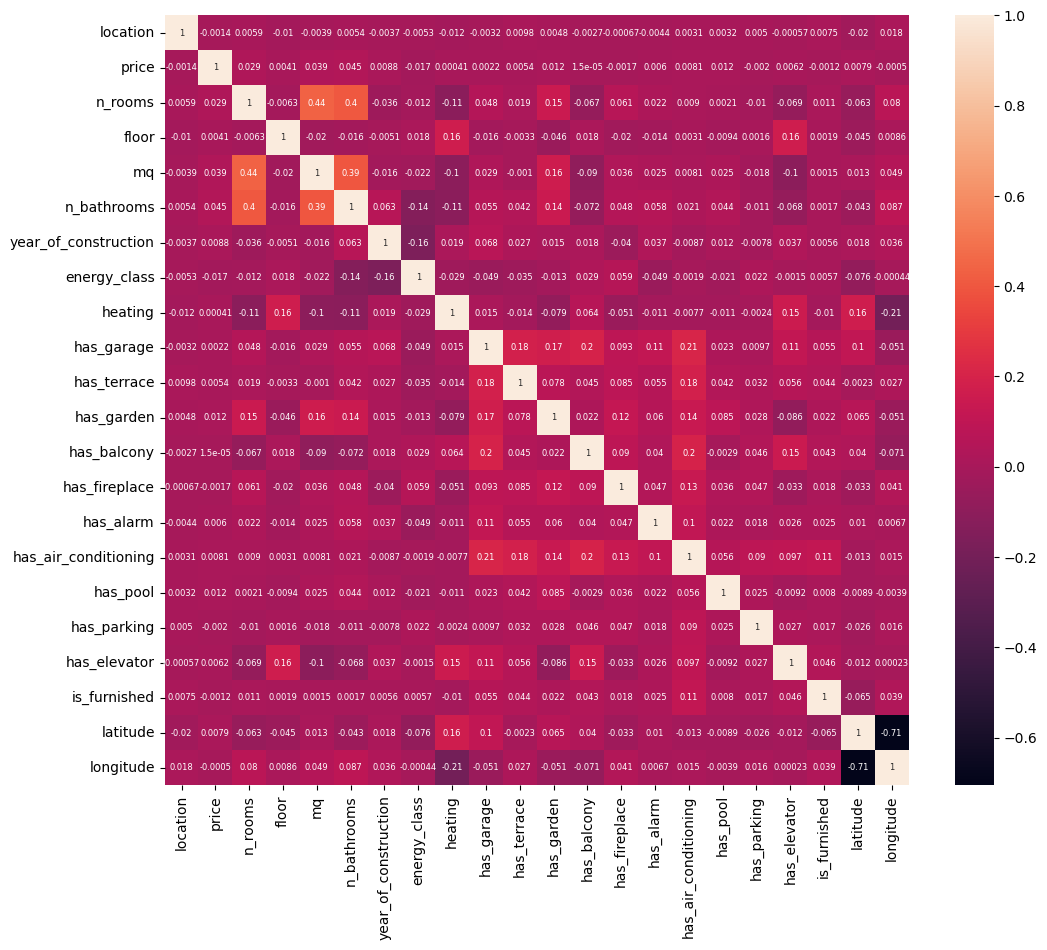

In [20]:
cor = df_clean_NaN.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot = True, annot_kws={"size": 6})
plt.show()

In [21]:
df = df.drop(columns=['floor','energy_class'])

si bien muchos otros no gurdan muy buena relacion al menos estan completos

In [22]:
df.duplicated().sum()

388

In [23]:
df = df.drop_duplicates()

# Extracción de características

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211658 entries, 10 to 213408
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   location              211658 non-null  int32  
 1   title                 211658 non-null  object 
 2   price                 175042 non-null  float64
 3   n_rooms               154201 non-null  float64
 4   mq                    207808 non-null  float64
 5   n_bathrooms           197945 non-null  float64
 6   year_of_construction  211658 non-null  float64
 7   heating               211658 non-null  int32  
 8   has_garage            211658 non-null  int64  
 9   has_terrace           211658 non-null  int64  
 10  has_garden            211658 non-null  int64  
 11  has_balcony           211658 non-null  int64  
 12  has_fireplace         211658 non-null  int64  
 13  has_alarm             211658 non-null  int64  
 14  has_air_conditioning  211658 non-null  int64  
 15  has_

In [25]:
df.to_csv('corte.csv', sep=',', encoding='utf-8', index=False, header=True)

In [26]:
unique_values = df['title'].unique()

if len(unique_values) > 50:
  top_occurences = df['title'].value_counts().head(50)
  print(top_occurences.to_markdown(numalign="left", stralign="left"))
else:
  print(unique_values)

| title                                                                             | count   |
|:----------------------------------------------------------------------------------|:--------|
| palazzo - edificio in vendita                                                     | 3373    |
| stabile o palazzo in vendita                                                      | 857     |
| albergo in vendita                                                                | 235     |
| appartamento in vendita                                                           | 88      |
| appartamento all'asta via salaria 142, monterotondo                               | 23      |
| villa unifamiliare in vendita                                                     | 18      |
| dimora storica in vendita                                                         | 17      |
| appartamento all'asta via del palagetto, borgo san lorenzo                        | 17      |
| trilocale via magnolie, eraclea mare, 

### No se porque correrlo asi genera NaN

In [27]:
df2 = df.copy()

tipos_propiedad = ['appartamento', 'appartamenti', 'villa', 'attico', 'quadrilocale', 'trilocale', 'bilocale', 'rustico', 'palazzo']
vectorizer = CountVectorizer(vocabulary=tipos_propiedad)
bolsa_palabras = vectorizer.fit_transform(df2['title'].values.astype('U')) 

# Concatenar el DataFrame original con la matriz de conteo de palabras
df2 = pd.concat([df2, pd.DataFrame(bolsa_palabras.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)

# Obtener los nombres de las columnas generadas por CountVectorizer
columnas_tipos_propiedad = vectorizer.get_feature_names_out()

# Encontrar el tipo de propiedad con el valor máximo en cada fila, usando las columnas correctas
df2['tipos_propiedad'] = df2[columnas_tipos_propiedad].idxmax(axis=1)

# Eliminar las columnas generadas por CountVectorizer y la columna 'title'
df2 = df2.drop(columns=columnas_tipos_propiedad)
df2 = df2.drop('title', axis=1)

print(df2)

        location    price  n_rooms     mq  n_bathrooms  year_of_construction  \
10        7021.0  90000.0      5.0  124.0          2.0                2002.0   
11        7021.0      NaN      4.0  200.0          3.0                2012.0   
12        7021.0      NaN      4.0  167.0          2.0                2012.0   
13        7021.0  59000.0      4.0  127.0          1.0                2001.0   
14        7021.0      NaN      NaN  205.0          2.0                2018.0   
...          ...      ...      ...    ...          ...                   ...   
210241       NaN      NaN      NaN    NaN          NaN                   NaN   
210275       NaN      NaN      NaN    NaN          NaN                   NaN   
210276       NaN      NaN      NaN    NaN          NaN                   NaN   
210648       NaN      NaN      NaN    NaN          NaN                   NaN   
211558       NaN      NaN      NaN    NaN          NaN                   NaN   

        heating  has_garage  has_terrac

In [28]:
df2 = pd.read_csv("corte.csv")

tipos_propiedad = ['appartamento', 'appartamenti', 'villa', 'attico', 'quadrilocale', 'trilocale', 'bilocale', 'rustico', 'palazzo']
vectorizer = CountVectorizer(vocabulary=tipos_propiedad)
bolsa_palabras = vectorizer.fit_transform(df2['title'].values.astype('U')) 

# Concatenar el DataFrame original con la matriz de conteo de palabras
df2 = pd.concat([df2, pd.DataFrame(bolsa_palabras.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)

# Obtener los nombres de las columnas generadas por CountVectorizer
columnas_tipos_propiedad = vectorizer.get_feature_names_out()

# Encontrar el tipo de propiedad con el valor máximo en cada fila, usando las columnas correctas
df2['tipos_propiedad'] = df2[columnas_tipos_propiedad].idxmax(axis=1)

# Eliminar las columnas generadas por CountVectorizer y la columna 'title'
df2 = df2.drop(columns=columnas_tipos_propiedad)
df2 = df2.drop('title', axis=1)

print(df2)

        location     price  n_rooms     mq  n_bathrooms  year_of_construction  \
0           7021   90000.0      5.0  124.0          2.0                2002.0   
1           7021       NaN      4.0  200.0          3.0                2012.0   
2           7021       NaN      4.0  167.0          2.0                2012.0   
3           7021   59000.0      4.0  127.0          1.0                2001.0   
4           7021       NaN      NaN  205.0          2.0                2018.0   
...          ...       ...      ...    ...          ...                   ...   
211653       459  100000.0      2.0   50.0          1.0                1994.0   
211654       459  130000.0      4.0  190.0          2.0                1994.0   
211655       459  210000.0      3.0   80.0          1.0                1920.0   
211656       459       NaN      3.0    NaN          1.0                1920.0   
211657       459  220000.0      3.0  111.0          2.0                1920.0   

        heating  has_garage

In [29]:
dicc = {
    "quadrilocale": 4,
    "attico": 1,
    "trilocale": 3,
    "bilocale": 2
}

for tipo, rooms in dicc.items():
    df2.loc[(df2["tipos_propiedad"] == tipo) & ((df2["n_rooms"].isnull()) | (df2["n_rooms"] == 0)), "n_rooms"] = rooms

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211658 entries, 0 to 211657
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   location              211658 non-null  int64  
 1   price                 175042 non-null  float64
 2   n_rooms               154532 non-null  float64
 3   mq                    207808 non-null  float64
 4   n_bathrooms           197945 non-null  float64
 5   year_of_construction  211658 non-null  float64
 6   heating               211658 non-null  int64  
 7   has_garage            211658 non-null  int64  
 8   has_terrace           211658 non-null  int64  
 9   has_garden            211658 non-null  int64  
 10  has_balcony           211658 non-null  int64  
 11  has_fireplace         211658 non-null  int64  
 12  has_alarm             211658 non-null  int64  
 13  has_air_conditioning  211658 non-null  int64  
 14  has_pool              211658 non-null  int64  
 15  

In [30]:
df2['antiguedad'] = pd.cut(df2['year_of_construction'], bins=[0, 1960, 1980, 2000, 2010, float('inf')],
                         labels=['Muy antigua', 'Antigua', 'Relativamente antigua', 'Moderna', 'Nueva'])

In [31]:
columnas_categoricas = ['tipos_propiedad','antiguedad']

# Iterar sobre la lista de nombres de columnas y aplicar LabelEncoder a cada columna
for columna in columnas_categoricas:
    df2[columna] = le.fit_transform(df2[columna])

In [32]:
df.duplicated().sum()


0

In [33]:
df2 = df2.drop_duplicates()

# Selección de características (2 técnicas)

In [34]:
null_counts = df2.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

price          36025
n_rooms        56835
mq              3828
n_bathrooms    13658
latitude          59
longitude         59
dtype: int64


In [35]:
df2_clean_NaN = df2.dropna()

X = df2_clean_NaN.drop(columns=['price'])
y = df2_clean_NaN['price']

In [36]:
print(df2_clean_NaN.isna().sum())

location                0
price                   0
n_rooms                 0
mq                      0
n_bathrooms             0
year_of_construction    0
heating                 0
has_garage              0
has_terrace             0
has_garden              0
has_balcony             0
has_fireplace           0
has_alarm               0
has_air_conditioning    0
has_pool                0
has_parking             0
has_elevator            0
is_furnished            0
latitude                0
longitude               0
tipos_propiedad         0
antiguedad              0
dtype: int64


## Univariate feature selection

In [37]:
### Applying feature selection method
select_kbest = SelectKBest(score_func=f_classif, k=10) 
select_kbest.fit_transform(X, y)

# show feature selection
selected_features = select_kbest.get_support()
print('The selected features are:', list(X.columns[selected_features]))

for features in list(X.columns[selected_features]):
    print(features)


The selected features are: ['n_rooms', 'mq', 'n_bathrooms', 'year_of_construction', 'has_garage', 'has_garden', 'has_pool', 'latitude', 'longitude', 'tipos_propiedad']
n_rooms
mq
n_bathrooms
year_of_construction
has_garage
has_garden
has_pool
latitude
longitude
tipos_propiedad


## Correlation coefficient

In [38]:
### Applying feature selection method
correlation_matrix = df2_clean_NaN.corr()
corr_with_target = correlation_matrix["price"].drop("price")


# Sort and show features by absolute correlation value
sorted_corr = corr_with_target.abs().sort_values(ascending=False)
print(f"Absolute Correlations with the Objective (price):\n{sorted_corr}")

# Define a threshold for correlation (e.g., keep features with |correlation| > 0.2)
threshold = 0.2
selected_features_corr = sorted_corr[sorted_corr > threshold].index.tolist()
print(f"Selected features are: {selected_features_corr}")
for features in selected_features_corr:
    print(features)

Absolute Correlations with the Objective (price):
n_bathrooms             0.037509
mq                      0.033562
n_rooms                 0.020611
tipos_propiedad         0.011735
has_pool                0.010723
has_garden              0.010215
latitude                0.008185
antiguedad              0.007876
year_of_construction    0.007634
is_furnished            0.006340
has_alarm               0.005066
has_terrace             0.004613
has_elevator            0.004463
has_air_conditioning    0.004386
has_garage              0.002239
has_fireplace           0.001942
has_parking             0.001913
longitude               0.001641
has_balcony             0.001520
heating                 0.000552
location                0.000277
Name: price, dtype: float64
Selected features are: []


## Backward elimination

In [39]:
lr = LinearRegression()
### Applying feature selection method
bfs = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='backward')
bfs.fit(X, y)


# show feature selection
selected_features = bfs.get_support()
print('The selected features are:', list(X.columns[selected_features]))


The selected features are: ['n_rooms', 'mq', 'n_bathrooms', 'year_of_construction', 'heating', 'has_terrace', 'has_garden', 'has_pool', 'latitude', 'tipos_propiedad', 'antiguedad']


# Limpieza de datos 2

In [40]:
null_counts = df2.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

price          36025
n_rooms        56835
mq              3828
n_bathrooms    13658
latitude          59
longitude         59
dtype: int64


Como mi variable "price" tiene algunos datos faltantes, y no quiero que mi modelo se confunda con datos inventados, voy a eliminar todas las filas que no tengan precio.

In [41]:
df.dropna(subset=['price'], inplace=True)
df2.dropna(subset=['price'], inplace=True)

In [42]:
null_counts = df2.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

n_rooms        43585
mq              2515
n_bathrooms    10337
latitude          49
longitude         49
dtype: int64


In [43]:
df2_features = df2[['price','n_rooms', 'mq', 'n_bathrooms', 'year_of_construction', 'heating', 'has_terrace', 'has_garden', 'has_pool', 'latitude', 'tipos_propiedad', 'antiguedad']].copy()

Me parece interesante que aun salgan duplicados

In [44]:
df2_features.duplicated().sum()

285

In [45]:
df2_features

,price,n_rooms,mq,n_bathrooms,year_of_construction,heating,has_terrace,has_garden,has_pool,latitude,tipos_propiedad,antiguedad
0,90000.0,5.0,124.0,2.0,2002.0,0,0,0,0,39.310894,1,1
3,59000.0,4.0,127.0,1.0,2001.0,0,0,0,0,39.310894,5,1
5,65000.0,2.0,45.0,1.0,1950.0,0,0,0,0,37.693285,6,2
6,120000.0,2.0,45.0,1.0,1900.0,0,0,0,0,37.693285,1,2
7,22000.0,2.0,70.0,1.0,1900.0,0,0,0,0,41.492925,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...
211652,269000.0,NaN,230.0,2.0,1960.0,0,0,0,0,41.125784,8,2
211653,100000.0,2.0,50.0,1.0,1994.0,0,0,0,0,41.125784,3,4
211654,130000.0,4.0,190.0,2.0,1994.0,0,0,0,0,41.125784,8,4
211655,210000.0,3.0,80.0,1.0,1920.0,0,0,0,0,41.125784,7,2


In [46]:
df2_features = df2_features.drop_duplicates()

In [47]:
column_list = sorted(df2_features.columns.values.tolist()) 

for column_name in column_list:
    unique_values = sorted(df2_features[column_name].unique()) 
    print(column_name, ":", unique_values)

count = df2_features.nunique()

antiguedad : [0, 1, 2, 3, 4]
has_garden : [0, 1]
has_pool : [0, 1]
has_terrace : [0, 1]
heating : [0, 1]
latitude : [35.511134150000004, 36.6838453, 36.7152093, 36.7265294, 36.7858319, 36.7935701, 36.8203141, 36.827897, 36.8314576, 36.8589209, 36.8908864, 36.9095158, 36.9219828, 36.9507336, 36.9514957, 37.02504, 37.031342, 37.034871, 37.0481124, 37.061855, 37.0646139, 37.0820396, 37.0833929, 37.0854713, 37.0888742, 37.1009166, 37.1016426, 37.1069373, 37.1185821, 37.126491, 37.1568537, 37.1579298, 37.1610157, 37.1782878, 37.1916637, 37.225088, 37.2307167, 37.2369363, 37.2372009, 37.2522942, 37.25844, 37.2648752, 37.2679139, 37.2749214, 37.2758806, 37.2795627, 37.284685, 37.2883127, 37.2901188, 37.29622, 37.2964289, 37.308393, 37.3122991, 37.3161967, 37.324221, 37.3282253, 37.3380858, 37.3485851, 37.358942, 37.388048, 37.4028533, 37.4031989, 37.4040529, 37.407941, 37.4089397, 37.44084, 37.494173, 37.5023612, 37.5027873, 37.5064786, 37.5133908, 37.5191722, 37.5196965, 37.5408351, 37.55421

<Axes: >

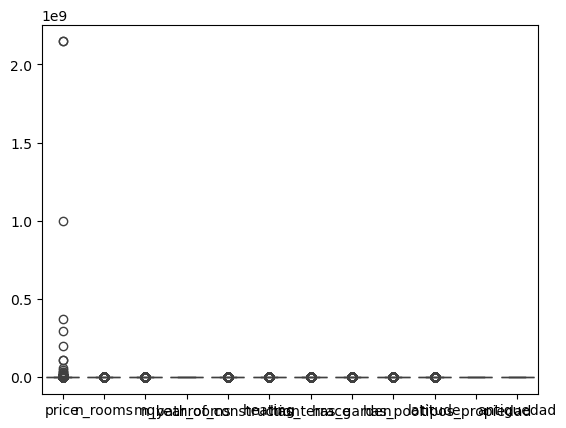

In [48]:
sns.boxplot(data=df2_features)

In [49]:
df2_features = df2_features[df2_features['price'] <= 11000000]

In [50]:
df2_features_clean_NaN = df2_features.dropna()

# Reducción de dimensionalidad (Una tecnica)

## Datos para reducción de dimensionalidad

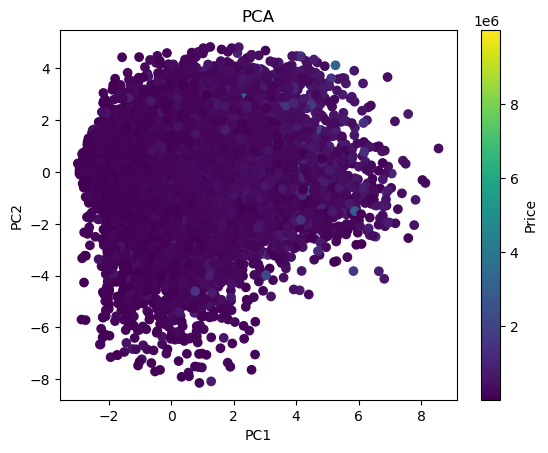

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PC1     128061 non-null  float64
 1   PC2     128061 non-null  float64
dtypes: float64(2)
memory usage: 2.0 MB
None


In [51]:
X = df2_features_clean_NaN.drop('price', axis=1)
y = df2_features_clean_NaN['price']

# Estandarizo los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.colorbar(label='Price')
plt.show()

print(df_pca.info())

# Resultado con una partición de los datos

In [52]:
# Splitting data into training and testing sets
X = df2_features_clean_NaN.drop('price', axis=1)
y = df2_features_clean_NaN['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Function to evaluate models and plot predictions
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f'Model: {model_name}')
    print(f'Train R^2: {r2_score(y_train, y_pred_train):.4f}')
    print(f'Test R^2: {r2_score(y_test, y_pred_test):.4f}')
    print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}')
    print('-'*40)
    
    # Plot the predictions vs real values
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test, y_pred_test, label='Predictions', color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.legend()
    plt.show()

Model: Linear Regression
Train R^2: 0.2319
Test R^2: 0.2467
Test RMSE: 119949.7061
----------------------------------------


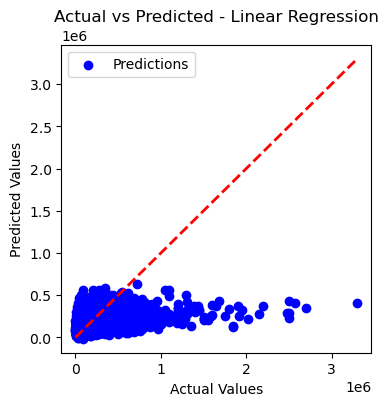

Model: Ridge Regression
Train R^2: 0.2319
Test R^2: 0.2467
Test RMSE: 119949.7155
----------------------------------------


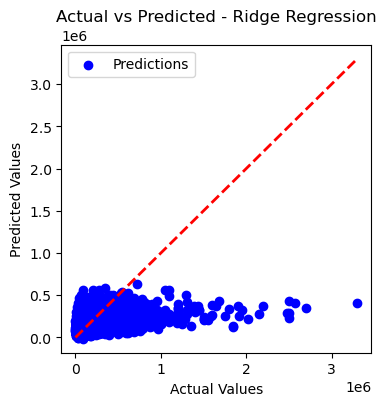

Model: Lasso Regression
Train R^2: 0.2319
Test R^2: 0.2467
Test RMSE: 119949.7039
----------------------------------------


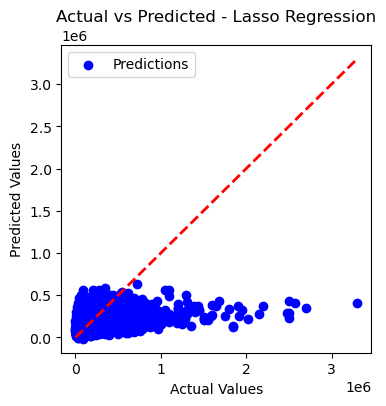

Model: Random Forest Regression
Train R^2: 0.9110
Test R^2: 0.3954
Test RMSE: 107455.5475
----------------------------------------


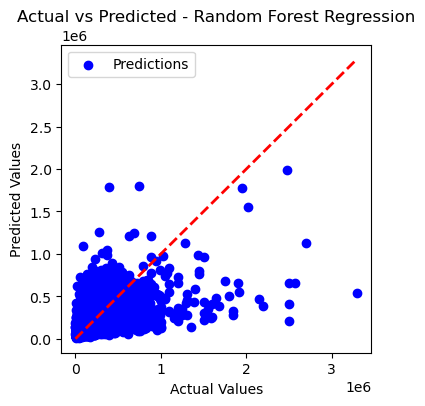

Model: Decision Tree Regression
Train R^2: 0.9993
Test R^2: -0.2125
Test RMSE: 152178.3458
----------------------------------------


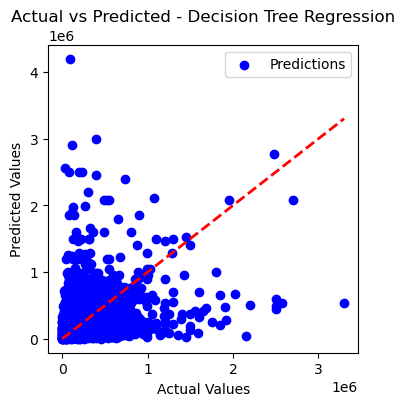

In [54]:
# 1. Linear Regression
linear_reg = LinearRegression()
evaluate_model(linear_reg, X_train, X_test, y_train, y_test, 'Linear Regression')

# 2. Ridge Regression
ridge_reg = Ridge(alpha=1.0)
evaluate_model(ridge_reg, X_train, X_test, y_train, y_test, 'Ridge Regression')

# 3. Lasso Regression
lasso_reg = Lasso(alpha=0.1)
evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, 'Lasso Regression')

# 4. Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf_reg, X_train, X_test, y_train, y_test, 'Random Forest Regression')

# 5. Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
evaluate_model(dt_reg, X_train, X_test, y_train, y_test, 'Decision Tree Regression')


In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_pca[['PC1', 'PC2']], y, test_size=0.2, random_state=42)

Model: Linear Regression
Train R^2: 0.1944
Test R^2: 0.2054
Test RMSE: 123191.0119
----------------------------------------


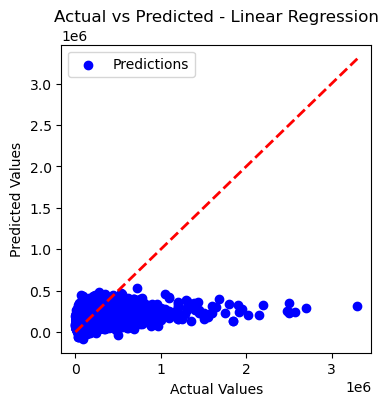

Model: Ridge Regression
Train R^2: 0.1944
Test R^2: 0.2054
Test RMSE: 123191.0087
----------------------------------------


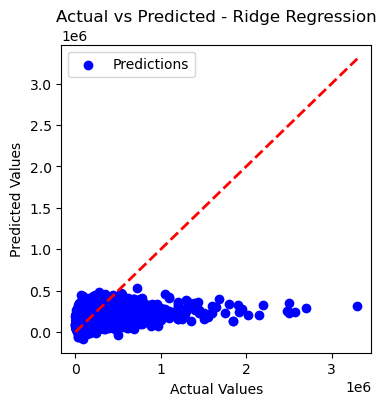

Model: Lasso Regression
Train R^2: 0.1944
Test R^2: 0.2054
Test RMSE: 123191.0110
----------------------------------------


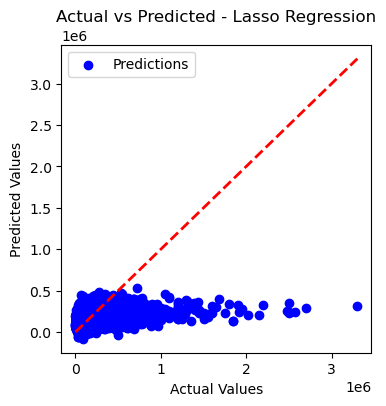

Model: Random Forest Regression
Train R^2: 0.8756
Test R^2: 0.1247
Test RMSE: 129292.4778
----------------------------------------


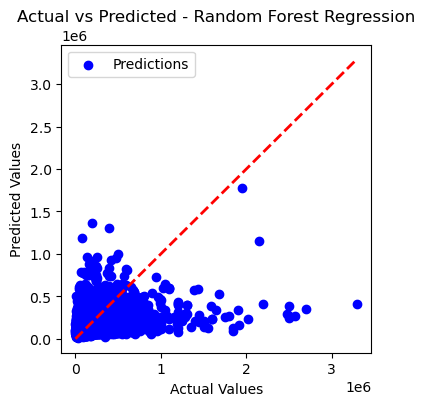

Model: Decision Tree Regression
Train R^2: 0.9993
Test R^2: -0.6376
Test RMSE: 176852.9565
----------------------------------------


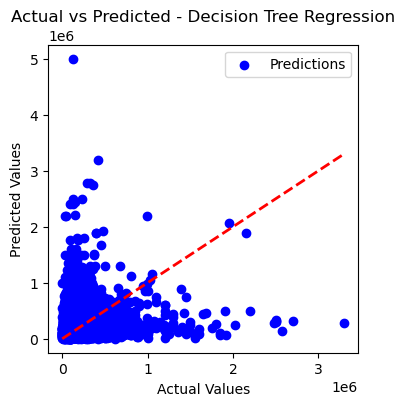

In [56]:
# 1. Linear Regression
linear_reg = LinearRegression()
evaluate_model(linear_reg, X_train, X_test, y_train, y_test, 'Linear Regression')

# 2. Ridge Regression
ridge_reg = Ridge(alpha=1.0)
evaluate_model(ridge_reg, X_train, X_test, y_train, y_test, 'Ridge Regression')

# 3. Lasso Regression
lasso_reg = Lasso(alpha=0.1)
evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, 'Lasso Regression')

# 4. Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf_reg, X_train, X_test, y_train, y_test, 'Random Forest Regression')

# 5. Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42) 
evaluate_model(dt_reg, X_train, X_test, y_train, y_test, 'Decision Tree Regression')


# Resultado con datos de prueba

In [57]:
df_test = pd.read_csv("Practica 3 test_housing_data_italy.csv")

df_test = df_test.drop(columns=['timestamp','availability','status'])
df_test = df_test[df_test['year_of_construction'] <= 2024]
columnas_categoricas = ['location', 'energy_class', 'heating']
# Iterar sobre la lista de nombres de columnas y aplicar LabelEncoder a cada columna
for columna in columnas_categoricas:
    df_test[columna] = le.fit_transform(df_test[columna])
df_test = df_test.drop(columns=['floor','energy_class'])

df_test.to_csv('df_test.csv', sep=',', encoding='utf-8', index=False, header=True)

df_test2 = pd.read_csv("df_test.csv")

tipos_propiedad = ['appartamento', 'appartamenti', 'villa', 'attico', 'quadrilocale', 'trilocale', 'bilocale', 'rustico', 'palazzo']
vectorizer = CountVectorizer(vocabulary=tipos_propiedad)
bolsa_palabras = vectorizer.fit_transform(df_test2['title'].values.astype('U')) 

# Concatenar el DataFrame original con la matriz de conteo de palabras
df_test2 = pd.concat([df_test2, pd.DataFrame(bolsa_palabras.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)

# Obtener los nombres de las columnas generadas por CountVectorizer
columnas_tipos_propiedad = vectorizer.get_feature_names_out()

# Encontrar el tipo de propiedad con el valor máximo en cada fila, usando las columnas correctas
df_test2['tipos_propiedad'] = df_test2[columnas_tipos_propiedad].idxmax(axis=1)

# Eliminar las columnas generadas por CountVectorizer y la columna 'title'
df_test2 = df_test2.drop(columns=columnas_tipos_propiedad)
df_test2 = df_test2.drop('title', axis=1)

dicc = {
    "quadrilocale": 4,
    "attico": 1,
    "trilocale": 3,
    "bilocale": 2
}

for tipo, rooms in dicc.items():
    df_test2.loc[(df_test2["tipos_propiedad"] == tipo) & ((df_test2["n_rooms"].isnull()) | (df_test2["n_rooms"] == 0)), "n_rooms"] = rooms

df_test2['antiguedad'] = pd.cut(df_test2['year_of_construction'], bins=[0, 1960, 1980, 2000, 2010, float('inf')],
                         labels=['Muy antigua', 'Antigua', 'Relativamente antigua', 'Moderna', 'Nueva'])

columnas_categoricas = ['tipos_propiedad','antiguedad']

# Iterar sobre la lista de nombres de columnas y aplicar LabelEncoder a cada columna
for columna in columnas_categoricas:
    df_test2[columna] = le.fit_transform(df_test2[columna])

df_test2_features = df_test2[['price','n_rooms', 'mq', 'n_bathrooms', 'year_of_construction', 'heating', 'has_terrace', 'has_garden', 'has_pool', 'latitude', 'tipos_propiedad', 'antiguedad']].copy()

df_test2_features_clean_NaN = df_test2_features.dropna()

df_test2_features_clean_NaN = df_test2_features_clean_NaN.drop_duplicates()





In [58]:
df_test2_features_clean_NaN.head()

,price,n_rooms,mq,n_bathrooms,year_of_construction,heating,has_terrace,has_garden,has_pool,latitude,tipos_propiedad,antiguedad
0,95000.0,5.0,190.0,2.0,1967.0,0,1,1,0,45.398258,1,0
1,99000.0,3.0,80.0,1.0,1970.0,0,0,1,0,45.881055,7,0
2,135000.0,5.0,210.0,1.0,1965.0,0,0,1,0,45.508429,8,0
3,180000.0,4.0,90.0,1.0,2005.0,0,0,0,0,45.381968,5,1
5,95000.0,5.0,128.0,2.0,1930.0,0,0,1,0,46.014371,8,2


In [59]:
df2_features_clean_NaN.head()


,price,n_rooms,mq,n_bathrooms,year_of_construction,heating,has_terrace,has_garden,has_pool,latitude,tipos_propiedad,antiguedad
0,90000.0,5.0,124.0,2.0,2002.0,0,0,0,0,39.310894,1,1
3,59000.0,4.0,127.0,1.0,2001.0,0,0,0,0,39.310894,5,1
5,65000.0,2.0,45.0,1.0,1950.0,0,0,0,0,37.693285,6,2
6,120000.0,2.0,45.0,1.0,1900.0,0,0,0,0,37.693285,1,2
7,22000.0,2.0,70.0,1.0,1900.0,0,0,0,0,41.492925,8,2


Model: Linear Regression
Train R^2: 0.2346
Test R^2: 0.2803
Test RMSE: 112673.9231
----------------------------------------


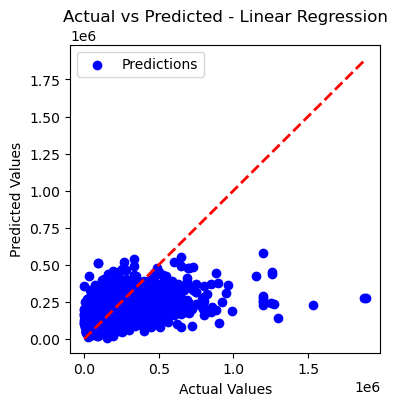

Model: Ridge Regression
Train R^2: 0.2346
Test R^2: 0.2803
Test RMSE: 112674.2905
----------------------------------------


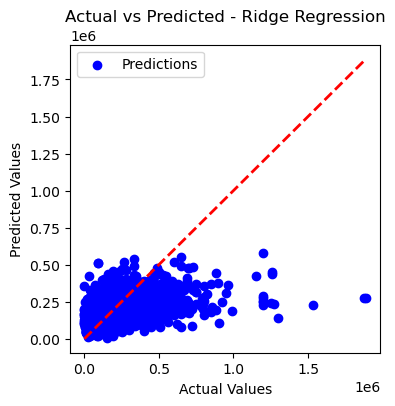

Model: Lasso Regression
Train R^2: 0.2346
Test R^2: 0.2803
Test RMSE: 112673.9632
----------------------------------------


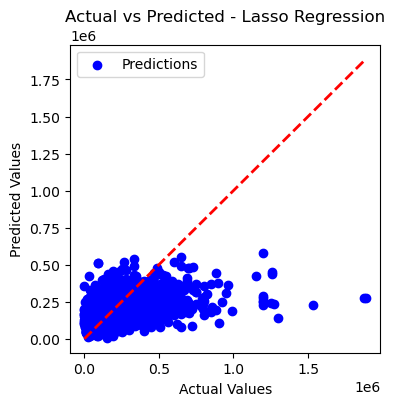

Model: Random Forest Regression
Train R^2: 0.9131
Test R^2: 0.4479
Test RMSE: 98685.4159
----------------------------------------


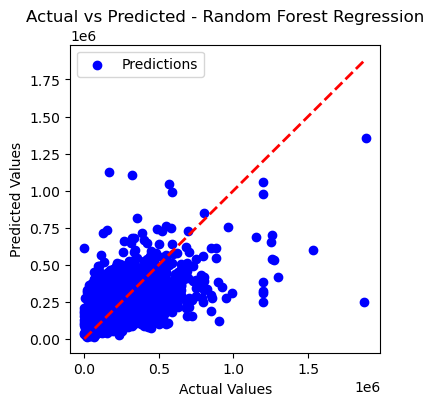

Model: Decision Tree Regression
Train R^2: 0.9992
Test R^2: -0.1564
Test RMSE: 142819.4093
----------------------------------------


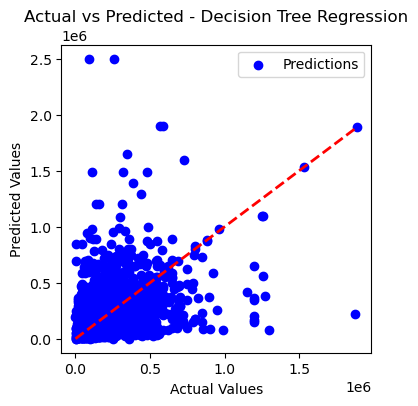

In [60]:
X_train = X 
y_train = y 
X_test = df_test2_features_clean_NaN.drop('price', axis=1)
y_test = df_test2_features_clean_NaN['price']
# 1. Linear Regression
linear_reg = LinearRegression()
evaluate_model(linear_reg, X_train, X_test, y_train, y_test, 'Linear Regression')

# 2. Ridge Regression
ridge_reg = Ridge(alpha=1.0)
evaluate_model(ridge_reg, X_train, X_test, y_train, y_test, 'Ridge Regression')

# 3. Lasso Regression
lasso_reg = Lasso(alpha=0.1)
evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, 'Lasso Regression')

# 4. Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf_reg, X_train, X_test, y_train, y_test, 'Random Forest Regression')

# 5. Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
evaluate_model(dt_reg, X_train, X_test, y_train, y_test, 'Decision Tree Regression')